# Question 1 Gradient Discent

In [352]:
import numpy as np
import math
import pylab as pl
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [353]:
def negativeGaussian(x,mu,Sigma):
    detSigma = np.linalg.det(Sigma)
    n = len(x)
    NC = -(1/(np.sqrt(((2*math.pi)**n)*detSigma))) # normalizing constant
    normalizedX = [a - b for a, b in zip(x, mu)] 
    invSigma = np.linalg.inv(Sigma)
    #print (np.inner(np.inner(normalizedX,invSigma),np.transpose(normalizedX)))
    kernel = np.exp(-0.5*(np.inner(np.inner(normalizedX,invSigma),np.transpose(normalizedX))))
    #print kernel
    value = NC*kernel
    
    gradient = [-value*a for a in np.inner(invSigma,normalizedX)]
    
    return(value,gradient)
    

In [354]:
def qBowl(x,b,A):
    quadForm = 0.5*np.inner(np.inner(np.transpose(x),A),x)
    dotForm = np.inner(np.transpose(x),b)
    
    value = quadForm - dotForm
    gradient = [a-b for a,b in zip(np.inner(A,x),b)]
    return (value,gradient)

In [355]:
a = [25,25]
mu = [1,3]
A = [[1,0],[0,1]]


In [356]:
qBowl(a,mu,A)

(525.0, [24, 22])

In [357]:
negativeGaussian([110,110],gaussMean,gaussCov)[1]

[7.2256232377243249e-10, 7.2256232377243249e-10]

In [358]:
1/(np.linalg.norm(negativeGaussian([100,100],gaussMean,gaussCov)[1]))

162632622.24428889

In [359]:
0.5*np.inner(np.inner(np.transpose(a),A),a) - np.inner(np.transpose(a),mu)

525.0

In [436]:
def batchGradientDiscent(function,initGuess,step,threshold,maxIter,*args):
    gradientNorm = []
    epsilon = 1
    errorPropagation = []
    iteration = 0
    #while iteration > 1:
    #if iteration < maxIter:
    while epsilon > threshold and iteration < maxIter : 
        if iteration==0:
            
            value = [float(i) for i in initGuess]
        #print value
        output = function(value,*args)
        
        #print output
        evaluateOld = function(value,*args)[0] # function evaluated at old point
        #print (evaluateOld)
        gradient = [float(i) for i in output[1]]
        #print gradient
        change = [a*step for a in gradient]
        #print change
        newValue = [a - b for a,b in zip(value,change)] #GDS equation
        
        #print newValue
        #print gradient
        
        #print(evaluateOld)
        evaluateNew = function(newValue,*args)[0]# function evaluated at new point
        #print(evaluateNew)
        epsilon = abs(evaluateNew - evaluateOld)
        value = newValue
        gradient= function(value,*args)[1]
        gNorm = np.linalg.norm(gradient)
        gradientNorm.append(gNorm)
        errorPropagation.append(epsilon)
        #print epsilon
        #print value   

        iteration+=1
        #print(iteration)
          
        
        
    return(gradientNorm, errorPropagation,value,iteration)

In [361]:
step = 1/(np.linalg.norm(negativeGaussian([15,10],gaussMean,gaussCov)[1]))

In [362]:
step = 1/(np.linalg.norm(negativeGaussian([15,10],gaussMean,gaussCov)[1]))
A  = batchGradientDiscent(negativeGaussian,[15,10],step,1e-15,130,gaussMean,gaussCov)

In [363]:
# Loading the parameters
def getData():

    # load the parameters for the negative Gaussian function and quadratic bowl function
    # return a tuple that contains parameters for Gaussian mean, Gaussian covariance,
    # A and b for quadratic bowl in order

    data = pl.loadtxt('../DataFiles/HW1/parametersp1.txt')

    gaussMean = data[0,:]
    gaussCov = data[1:3,:]

    quadBowlA = data[3:5,:]
    quadBowlb = data[5,:]

    return (gaussMean,gaussCov,quadBowlA,quadBowlb) 



In [364]:
gaussMean,gaussCov,quadBowlA,quadBowlb = getData()

In [365]:
step = 1/(np.linalg.norm(negativeGaussian([15,10],gaussMean,gaussCov)[1]))
batchGradientDiscent(negativeGaussian,[15,10],step,1e-15,130,gaussMean,gaussCov)

([6.3154713180494556e-07,
  5.0612941154583828e-07,
  4.049013869387108e-07,
  3.2355147051489189e-07,
  2.5835775875233399e-07,
  2.0620435397410093e-07,
  1.6453013832379733e-07,
  1.3125356536479713e-07,
  1.0469466657775076e-07,
  8.3503520762017889e-08,
  6.6598412865622446e-08,
  5.3114063156026697e-08,
  4.2359089727880962e-08,
  3.3781448826630723e-08,
  2.6940550425632615e-08,
  2.1484856472924111e-08,
  1.713393240863856e-08,
  1.3664091190719806e-08,
  1.0896923148314546e-08,
  8.6901378218325667e-09,
  6.9302549459965973e-09,
  5.5267728194852998e-09,
  4.407516248981534e-09,
  3.5149258861799514e-09,
  2.8030986663956077e-09,
  2.2354274192225818e-09,
  1.7827184009513852e-09,
  1.4216900084716208e-09,
  1.1337755029547774e-09,
  9.041681884968541e-10,
  7.2105995083930416e-10,
  5.7503400078856882e-10,
  4.5858059501792195e-10,
  3.6571083019398719e-10,
  2.9164864943990862e-10,
  2.3258522211234422e-10,
  1.8548306542322075e-10,
  1.4791983445057462e-10,
  1.179637470979

In [366]:
step = 1/(np.linalg.norm(qBowl([25,25],quadBowlb,quadBowlA)[1]))
batchGradientDiscent(qBowl,[25,25],step,1e-3,200,quadBowlb,quadBowlA)
print step

0.0282842712475


In [367]:
print np.linalg.norm(quadBowlA)
print quadBowlb

15.8113883008
[ 400.  400.]


In [368]:
A = qBowl([20,0],quadBowlb,quadBowlA)[0]
B = qBowl([20,0],quadBowlb,quadBowlA)[1]
C = B*0.01
print [20,0] - C
qBowl([22,3],quadBowlb,quadBowlA)[0]

TypeError: can't multiply sequence by non-int of type 'float'

In [ ]:
#batchGradientDiscent(qBowl,[26,26],0.001,1e-1,10,quadBowlb,quadBowlA)
#np.linalg.norm()
print SP1
diff = [a-b for a,b in zip(SP1,gaussMean)]
A = -negativeGaussian(SP1,gaussMean,gaussCov)[0]*np.inner(np.linalg.inv(gaussCov),diff)
1/np.linalg.norm(A)
#np.inner(np.linalg.inv(gaussCov),diff)

Quadratic bowl shows some very erratic behavior unless the startiing point is very clos
and the threshold is relatively larger

In [ ]:
# Effect of staritng guess
# Add random noise to the analtyical solution (Close to the solution, a bit far and then very far from the solution)
# For neagtive Gaussain
NGAnalyticSoln = gaussMean
SP1 =NGAnalyticSoln +  np.random.normal(1,1,len(NGAnalyticSoln))
SP2 =NGAnalyticSoln +  np.random.normal(5,1,len(NGAnalyticSoln))
SP3 =NGAnalyticSoln +  np.random.normal(10,1,len(NGAnalyticSoln))

step = 1/(np.linalg.norm(negativeGaussian(SP1,gaussMean,gaussCov)[1]))
SP1output =  batchGradientDiscent(negativeGaussian,SP1,step,1e-10,130,gaussMean,gaussCov)
step = 1/(np.linalg.norm(negativeGaussian(SP2,gaussMean,gaussCov)[1]))
SP2output =  batchGradientDiscent(negativeGaussian,SP2,step,1e-10,130,gaussMean,gaussCov)
step = 1/(np.linalg.norm(negativeGaussian(SP3,gaussMean,gaussCov)[1]))
SP3output =  batchGradientDiscent(negativeGaussian,SP3,step,1e-10,130,gaussMean,gaussCov)

In [ ]:
len(SP1output[1])

In [ ]:
# Image for satring guess plot
plt.plot(SP1output[1])
plt.plot(SP2output[1])
plt.plot(SP3output[1])
#plt.plot(X,Y,'o')
#plt.plot(xtrue,fValue0)
plt.xlabel('x')
plt.ylabel('y')
plt.yscale('log')
plt.title('Linear Regression (M=0)')
#plt.show()


In [ ]:
# Effect of staritng guess
# Add random noise to the analtyical solution (Close to the solution, a bit far and then very far from the solution)
# For Quadratic Bowl
NGAnalyticSoln = np.inner(np.linalg.inv(quadBowlA),quadBowlb)

SP1 =NGAnalyticSoln +  np.random.normal(1,1,len(NGAnalyticSoln))
SP2 =NGAnalyticSoln +  np.random.normal(5,1,len(NGAnalyticSoln))
SP3 =NGAnalyticSoln +  np.random.normal(10,1,len(NGAnalyticSoln))

step = 1/(np.linalg.norm(qBowl(SP1,quadBowlb,quadBowlA)[1]))
SP1output =  batchGradientDiscent(qBowl,SP1,step,1e-10,1000,quadBowlb,quadBowlA)
step = 1/(np.linalg.norm(qBowl(SP2,quadBowlb,quadBowlA)[1]))
SP2output =  batchGradientDiscent(qBowl,SP2,step,1e-10,1000,quadBowlb,quadBowlA)
step = 1/(np.linalg.norm(qBowl(SP3,quadBowlb,quadBowlA)[1]))
SP3output =  batchGradientDiscent(qBowl,SP3,step,1e-10,1000,quadBowlb,quadBowlA)

In [ ]:
# Image for satring guess plot, quadratic Bowl
plt.plot(SP1output[1])
plt.plot(SP2output[1])
plt.plot(SP3output[1])
#plt.plot(X,Y,'o')
#plt.plot(xtrue,fValue0)
plt.xlabel('x')
plt.ylabel('y')
plt.yscale('log')
plt.title('Linear Regression (M=0)')
#plt.show()

# Question 2

In [ ]:
def finiteDifference(function,sp,h,*args):

    fdApprox = []
    for i in range(len(sp)):
        Lower = [float(j) for j in sp]
        Higher = [float(j) for j in sp]
        Lower[i] = Lower[i] - 0.5*h
        #print Lower
        Higher[i] = Higher[i] + 0.5*h
        #print Lower
        #print Higher
        higherValue = function(Higher,*args)[0]
        lowerValue = function(Lower,*args)[0]
        #print higherValue
        #print lowerValue
        fdApprox.append((higherValue - lowerValue)/h)
        #increment = [0.5*h + b for  b in sp]
        #higherInput = [a + b for a, b in zip(sp, increment)] 
        #lowerInput = [a - b for a, b in zip(sp, increment)]
        #higher = function( higherInput,*args)[0]
        #lower = function(lowerInput,*args)[0]
        #fdApprox = (higher - lower)/h
    return(fdApprox)


In [ ]:
finiteDifference(qBowl,[1,2],10000,quadBowlb,quadBowlA)

In [ ]:
qBowl([1,2],quadBowlb,quadBowlA)

In [ ]:
# Finite difference comparison
Sp= [5,7]
Sp2 = [26.66,26.66]
print negativeGaussian(Sp,gaussMean,gaussCov)[1]
h = [1000000,1000,10,1,0.1,0.01,0.001]
NGfiniteDifferenceList = []
QBowlfiniteDifferenceList = []
for i in range(len(h)):
    fdNG = finiteDifference(negativeGaussian,Sp,h[i],gaussMean,gaussCov)
    AnNG = negativeGaussian(Sp,gaussMean,gaussCov)[1]
    NGfiniteDifferenceList.append(np.linalg.norm(np.array(fdNG) -np.array(AnNG)))
    fdQB = finiteDifference(qBowl,Sp2,h[i],quadBowlb,quadBowlA)
    AnQB = qBowl(Sp2,quadBowlb,quadBowlA)[1]
    QBowlfiniteDifferenceList.append(np.linalg.norm(np.array(fdQB) -np.array(AnQB)))
    
    
    
    
print NGfiniteDifferenceList
print  QBowlfiniteDifferenceList

In [ ]:
finiteDifference(qBowl,Sp2,1,quadBowlb,quadBowlA)

In [ ]:
qBowl(Sp2,quadBowlb,quadBowlA)[1]

In [ ]:
# Image for satring guess plot
plt.plot(NGfiniteDifferenceList)
plt.plot( QBowlfiniteDifferenceList)
#plt.plot(SP3output[1])
#plt.plot(X,Y,'o')
#plt.plot(xtrue,fValue0)
plt.xlabel('x')
plt.ylabel('y')
plt.yscale('log')
plt.title('Linear Regression (M=0)')
#plt.show()

# # Data for SGD

In [686]:
# Loading the data

def getData():
    
    # load the fitting data for X and y and return as elements of a tuple
    # X is a 100 by 10 matrix and y is a vector of length 100
    # Each corresponding row for X and y represents a single data sample

    X = pl.loadtxt('../DataFiles/HW1/fittingdatap1_x.txt')
    y = pl.loadtxt('../DataFiles/HW1/fittingdatap1_y.txt')

    return (X,y) 

In [687]:
X,y = getData()

In [688]:
X.shape

(100, 10)

In [689]:
A = np.dot(np.linalg.inv(np.dot(np.transpose(X),X)),np.transpose(X))

In [690]:
trueSp = np.inner(A,y)
trueSp

array([  0.5032541 ,  -2.3367948 ,  -6.31670032,   6.81230107,
        -1.06337989,   6.67469398,   3.4118044 ,  -0.45573592,
       -12.94593466,  15.73289812])

Least Square function

In [691]:
def leastSquare(theta,X,y):
    #y = y.ravel()
    intermediate = np.inner(X,theta) - y
    value = np.inner(np.transpose(intermediate),intermediate)
    gradient = 2*np.inner(np.transpose(X),intermediate)
        
    return(value,gradient)


In [692]:
theta = [1,2,3,4,-5,6,7,8,9,-10]

In [693]:
intermediate=  np.inner(X[1,],trueSp) - y[1]
value = np.inner(np.transpose(intermediate),intermediate)
gradient = 2*np.inner(np.transpose(X[1,]),intermediate)
print gradient 
leastSquare(trueSp,X[1,],y[1])

[  8.35941938e-01   1.10289025e+03   1.02008172e+03  -1.26978323e+02
   8.43653974e+02   4.88648917e+02  -4.28681082e+02   1.83080712e+02
   6.27547270e+02  -6.35061319e+02]


(246.90447611861788,
 array([  8.35941938e-01,   1.10289025e+03,   1.02008172e+03,
         -1.26978323e+02,   8.43653974e+02,   4.88648917e+02,
         -4.28681082e+02,   1.83080712e+02,   6.27547270e+02,
         -6.35061319e+02]))

In [694]:
#np.linalg.norm(leastSquare(trueSp+0.000000001,X,y)[1])

In [695]:
print np.linalg.norm((leastSquare(trueSp,X,y)[1]))
print leastSquare(trueSp,X,y)[1]

8.08898029578e-10
[  7.22795585e-11   3.46213943e-11   7.47740492e-11  -3.55712868e-11
   2.15244461e-11  -1.43022159e-10   8.23569515e-12   6.10197803e-11
  -6.08653302e-10  -4.95850632e-10]


In [696]:
sp = [0.1]*10
trueSp

array([  0.5032541 ,  -2.3367948 ,  -6.31670032,   6.81230107,
        -1.06337989,   6.67469398,   3.4118044 ,  -0.45573592,
       -12.94593466,  15.73289812])

In [504]:
step = 1/np.linalg.norm(leastSquare(sp,X,y)[1])
print step

5.43333039369e-07


In [526]:
batchGradientDiscent(leastSquare,[0.1]*10,step,1e-19,1000,X,y)

([1757133.2780891692,
  1677875.3507771338,
  1602502.6990951814,
  1530811.8774039478,
  1462610.6298304147,
  1397717.2530206023,
  1335959.9961464857,
  1277176.4959310552,
  1221213.2445944333,
  1167925.0887538954,
  1117174.7574321893,
  1068832.4174421981,
  1022775.2545223556,
  978887.0786967359,
  937057.95242691913,
  897183.84020994115,
  859166.27835834154,
  822912.06377483637,
  788332.96060584334,
  755345.42372528778,
  723870.33806309151,
  693832.77285182953,
  665161.74992041942,
  637790.02521566313,
  611653.88278123515,
  586692.9404694495,
  562849.96670409327,
  540070.70765295776,
  518303.7242065458,
  497500.23819503159,
  477613.98730895523,
  458601.08822054823,
  440419.90743209986,
  423030.93940552254,
  406396.69155336072,
  390481.57569602109,
  375251.80561307038,
  360675.30033815478,
  346721.59286750644,
  333361.7439712176,
  320568.26081453956,
  308315.02011347754,
  296577.1955649663,
  285331.18930698751,
  274554.56717818056,
  264225.997559

In [463]:
trueSp


array([  0.5032541 ,  -2.3367948 ,  -6.31670032,   6.81230107,
        -1.06337989,   6.67469398,   3.4118044 ,  -0.45573592,
       -12.94593466,  15.73289812])

In [464]:
a

15.732898120720392

# Stochastic Gradient Discent

In [742]:
#function,initGuess,step,threshold,maxIter,*args
def stochasticGradientDiscent(function,initGuess,threshold,maxIter,tau0,kappa,*args):
    gradientNorm = []
    epsilon = 1
    k = kappa
    
    steps = 0
    iteration = 0
    X = args[0]
    Y = args[1]
    n = X.shape[0]
    print n
    print maxIter 
    ConvergedTheta  = []
    #indTheta =initGuess
    #j = 0
    for j in range(maxIter): 
        #print indTheta
        for i in range(n):
            #print i
            if epsilon > threshold:
                
                indX = X[i,]
                indY = Y[i]
                
                if steps ==0:
                    indTheta = initGuess
                #intermediate = np.inner(indX,indTheta) - y
                output = function(indTheta,indX,indY)
                #print indTheta
                
                
                #print indTheta
                value = output[0]
                gradient = output[1]
                #print gradient
                etaT = (1./((tau0+steps)*np.linalg.norm(gradient)))**k
                #print etaT
                #print 1./((tau0+steps)*np.linalg.norm(gradient))**k
                change = [a*etaT for a in gradient]
                #print change
                newTheta = [a - b for a,b in zip(indTheta,change)] #GDS equation
                #print newTheta
                newValue = function(newTheta,indX,indY)[0]
                epsilon = abs(function(indTheta,X,Y)[0] - function(newTheta,X,Y)[0])
                #epsilon = np.linalg.norm(function(newTheta,indX,indY)[1])
                #epsilon = np.linalg.norm([a - b for a,b in zip(indTheta,newTheta)])
                print(epsilon)
                steps= steps +1            
                indTheta = newTheta
                gradientNorm.append(np.linalg.norm(gradient))
                print steps
                #print indTheta
                ConvergedTheta = indTheta
            else:
                print "SGD converged"
                #ConvergedTheta = indTheta
                break
                
        #j = j + 1  
        #print iteration 
    print steps
    return(indTheta,gradientNorm)

In [729]:
trueSp

array([  0.5032541 ,  -2.3367948 ,  -6.31670032,   6.81230107,
        -1.06337989,   6.67469398,   3.4118044 ,  -0.45573592,
       -12.94593466,  15.73289812])

In [716]:
print leastSquare(trueSp+1,X,y)
print leastSquare(trueSp,X,y)

(517053.08329709718, array([ 156154.98933064,   85223.50399676,  124651.09368344,
        115711.33802906,   77742.55644782,   60043.35759262,
         63092.92258076,  127016.42767924,  121652.21008802,
         86151.33874348]))
(8333.2142111780358, array([  7.22795585e-11,   3.46213943e-11,   7.47740492e-11,
        -3.55712868e-11,   2.15244461e-11,  -1.43022159e-10,
         8.23569515e-12,   6.10197803e-11,  -6.08653302e-10,
        -4.95850632e-10]))


In [717]:
#print trueSp
u = np.linalg.norm(leastSquare(trueSp+0.0000001,X[4,],y[4])[0])
#etaT = (1./((3+1)*u))**0.9
#print etaT
#change = [a*etaT for a in leastSquare(trueSp,X[0,],y[0])[1]]
#print change
#newTheta = [a - b for a,b in zip(trueSp,change)] 
#print newTheta
print u
np.linalg.norm(leastSquare(trueSp,X[4,],y[4])[1])

77.4052453997


818.39732344132449

In [718]:
print trueSp
trueSp+0.5

[  0.5032541   -2.3367948   -6.31670032   6.81230107  -1.06337989
   6.67469398   3.4118044   -0.45573592 -12.94593466  15.73289812]


array([  1.0032541 ,  -1.8367948 ,  -5.81670032,   7.31230107,
        -0.56337989,   7.17469398,   3.9118044 ,   0.04426408,
       -12.44593466,  16.23289812])

In [745]:
A = stochasticGradientDiscent(leastSquare,trueSp+5,1e-3,50,5,0.9,X,y)
print A[0]

100
50
337488.833121
1
439228.494048
2
598821.085606
3
152065.117809
4
578466.251664
5
88142.3249255
6
252084.899961
7
218000.094343
8
36697.4178013
9
34360.2797183
10
10879.6876197
11
229767.501483
12
97264.4547808
13
62601.3431178
14
103187.23006
15
51085.0021073
16
30039.3298758
17
11922.2237734
18
107580.89361
19
26823.8539135
20
32585.712028
21
104889.042658
22
10680.7706462
23
15325.4808826
24
45449.3823939
25
10108.0070439
26
11361.6242974
27
582.243908094
28
67341.1649568
29
87675.8991344
30
18991.5714721
31
50333.6577213
32
7410.11696964
33
12871.0289119
34
94758.9181117
35
22993.8527865
36
16214.1681604
37
35170.9556554
38
44846.7836979
39
23296.4592382
40
75977.4709507
41
23643.7061001
42
77669.283645
43
4684.35166413
44
44307.4286106
45
5882.25588318
46
41177.6025576
47
13686.9947434
48
66360.1957849
49
66394.547141
50
4174.87619482
51
76645.2698751
52
47894.5303431
53
45245.6440002
54
41606.7326608
55
55560.4788912
56
12145.2706667
57
11608.1775837
58
1277.70305899
59
3615

In [746]:
B = stochasticGradientDiscent(leastSquare,trueSp+0.5,1e-5,500,5,0.9,X,y)
print B[0]

100
500
18312.9544325
1
19420.5443426
2
21334.8249981
3
764.885086774
4
22017.5559261
5
6611.69843291
6
12165.511118
7
3530.69824615
8
1206.59767201
9
6050.72081871
10
4470.28830511
11
2580.74872602
12
1231.88261977
13
509.004865786
14
538.510240438
15
1889.70140717
16
551.075820235
17
896.878268354
18
1566.41168777
19
1007.18477479
20
1019.90544928
21
149.612427753
22
882.255298192
23
700.260828651
24
959.267323639
25
287.699094743
26
197.09727766
27
3042.17802368
28
890.341622283
29
477.635077023
30
675.264486647
31
1145.14693127
32
1017.83142928
33
779.573765311
34
2479.06084995
35
413.394663521
36
946.296846146
37
236.592356972
38
1440.08146301
39
477.896663316
40
2090.1655639
41
777.175684924
42
1978.10668566
43
116.637430859
44
343.219851617
45
78.2767100006
46
708.413837351
47
279.328028505
48
395.058156505
49
1131.78916851
50
610.611081804
51
590.531311936
52
540.953232435
53
290.914332413
54
27.4342633026
55
274.065380767
56
68.4888227804
57
40.6258233119
58
325.771638946
59
6

In [641]:
trueSp

array([  0.5032541 ,  -2.3367948 ,  -6.31670032,   6.81230107,
        -1.06337989,   6.67469398,   3.4118044 ,  -0.45573592,
       -12.94593466,  15.73289812])

In [516]:
leastSquare([0.51383678361127649,
  -2.3221537768035656,
  -6.3054180177946337,
  6.7490839223594641,
  -1.0598129042871163,
  6.741359265707608,
  3.454212255283466,
  -0.45027927985692645,
  -12.971226014269694,
  15.741903392724566],X,y)[1]

array([    8.39786936,  1470.50988584,   989.49181439, -4460.14719887,
        -956.05299239,  4472.62864286,  1219.48517332,   377.18093142,
       -1808.43345041,  1026.54815531])

In [524]:
Sp=trueSp+0.001

In [525]:
np.linalg.norm(leastSquare(Sp,X,y)[1])

335.49776194767549

In [ ]:
a = np.inner(X[0,],sp) - y[0]
print X[0,]
nu = np.linalg.norm(2*np.transpose(X[0,])*a)
eta = (1./((2+1)*nu))**0.9
print sp - eta*nu
print sp

In [ ]:
step = 1/np.linalg.norm(leastSquare(sp,X[1,],y[1])[1])
print step
print trueSp

In [ ]:
np.linalg.norm(leastSquare([0.50034016052490493, -2.319209537499022, -6.3299194407028789, 6.8037412098861694, -1.062374491272561, 6.6702575834680333, 3.4242693800619417, -0.44371814359307221, -12.951667951630881, 15.737072262969543],X[80,],y[80])[1])

In [ ]:
stochasticGradientDiscent(leastSquare,trueSp,1e-4,3,3,0.9,X,y)

In [ ]:
i = 1
indTheta = sp
indX = X[i,]
indY = y[i]
value = (np.inner(np.transpose(indX),indTheta) - indY)**2
gradient = 2*(np.inner(np.transpose(indX),indTheta) - indY)*indX
#print value,gradient
#print np.linalg.norm(gradient)
tau0 = 2
k = 0.8
j = 1
etaT = (1./(tau0+(j+1)))**k
print etaT
newTheta = indTheta - etaT*gradient
#print gradient
#print etaT*gradient
print newTheta
print np.inner(np.transpose(indX),indTheta) - indY
#2*(np.inner(np.transpose(indX),newTheta) - indY)*indX

In [ ]:
sp

In [ ]:
J = 0
while J < 3:
    for i in range(2):
        print "cdcw"
    J = J + 1

In [ ]:
sp

In [ ]:
indX = X[i,]
indY = y[i]
value = (np.inner(np.transpose(indX),sp) - indY)**2
value
2*(np.inner(np.transpose(indX),sp) - indY)*indX

In [ ]:
def additional(function,f,d,*args):
    return(function(*args)+f**d)


In [ ]:
add(23,31)

In [ ]:
additional(mult,23,2,12,3)

In [ ]:
23**2

In [ ]:
abs(23-132)

In [ ]:
 x = np.arange(30).reshape(6,5)

In [ ]:
x[:,1]

In [ ]:
data = pl.loadtxt('../DataFiles/HW1/curvefittingp2.txt')

## Linear Basis Function Regression

In [748]:
# Data for question 2
import matplotlib.pyplot as plt
import pylab as pl

def getData(ifPlotData=True):
    # load the fitting data and (optionally) plot out for examination
    # return the X and Y as a tuple

    data = pl.loadtxt('../DataFiles/HW1/curvefittingp2.txt')

    X = data[0,:]
    Y = data[1,:]

    if ifPlotData:
        plt.plot(X,Y,'o')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()

    return (X,Y)

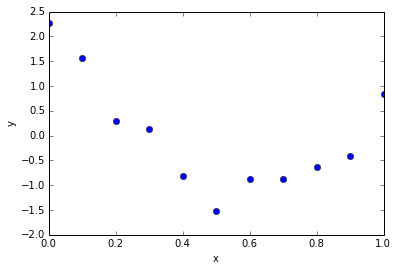

In [749]:
X,Y = getData(ifPlotData=True)


In [750]:
X

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])

In [751]:
def LBFRegression(X,y,m):
    designMat = np.zeros((len(X),m+1))
    for i in range(m+1):
        #print([a**i for a in X])
        designMat[:,i] = [a**i for a in X]
        
        
    mle = np.inner(np.dot(np.linalg.inv(np.dot(np.transpose(designMat),designMat)),np.transpose(designMat)),y)
    fittedValues = np.dot(designMat,np.transpose(mle))
    return(mle,fittedValues)

### 2.1

In [752]:
xtrue = np.linspace(0,1,100) # 100 linearly spaced numbers
ytrue = np.cos(np.pi*xtrue)+1.5*np.cos(2*np.pi*xtrue) # computing the values of sin(x)/x
noise = np.random.normal(0,0.01,100)
ytrue = ytrue+noise


weights0 = LBFRegression(X,Y,0)[0]
m = 0
designMat = np.zeros((len(xtrue),m+1))
for i in range(m+1):
    designMat[:,i] = [a**i for a in xtrue]


fValue0 = np.inner(designMat,np.transpose(weights0))

weights1 = LBFRegression(X,Y,1)[0]
m = 1
designMat = np.zeros((len(xtrue),m+1))
for i in range(m+1):
    designMat[:,i] = [a**i for a in xtrue]


fValue1 = np.inner(designMat,np.transpose(weights1))



weights3 = LBFRegression(X,Y,3)[0]
m = 3
designMat = np.zeros((len(xtrue),m+1))
for i in range(m+1):
    designMat[:,i] = [a**i for a in xtrue]


fValue3 = np.inner(designMat,np.transpose(weights3))



weights10 = LBFRegression(X,Y,10)[0]
m = 10
designMat = np.zeros((len(xtrue),m+1))
for i in range(m+1):
    designMat[:,i] = [a**i for a in xtrue]

weights10 = LBFRegression(X,Y,10)[0]
fValue10 = np.inner(designMat,np.transpose(weights10))

In [753]:
fValue10


array([ 2.28013448,  1.79391397,  1.58741861,  1.5457288 ,  1.58651516,
        1.65331598,  1.70983853,  1.73517068,  1.71979784,  1.6623286 ,
        1.56684075,  1.44076631,  1.293242  ,  1.13385782,  0.97174315,
        0.81493557,  0.66998334,  0.54173782,  0.43329704,  0.34606615,
        0.27990509,  0.23333752,  0.20379884,  0.18790481,  0.18172494,
        0.18104813,  0.1816304 ,  0.17941703,  0.17073339,  0.15244098,
        0.1220563 ,  0.07783235,  0.01880309, -0.05520715, -0.14360672,
       -0.24508887, -0.3577091 , -0.47898339, -0.60600257, -0.73555824,
       -0.86427529, -0.9887464 , -1.10566406, -1.21194574, -1.30484852,
       -1.38206954, -1.44182946, -1.48293648, -1.50482898, -1.50759572,
       -1.49197285, -1.45931786, -1.41156108, -1.35113614, -1.28089117,
       -1.20398342, -1.1237602 , -1.04362973, -0.96692591, -0.89677134,
       -0.83594315, -0.78674658, -0.7509011 , -0.7294441 , -0.72265688,
       -0.7300174 , -0.75018398, -0.7810136 , -0.81961741, -0.86

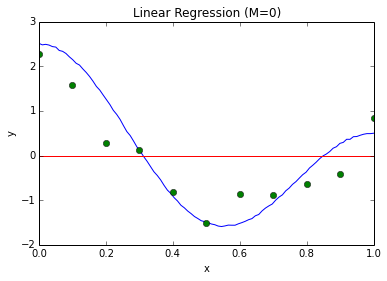

In [754]:
from pylab import savefig

plt.plot(xtrue,ytrue)
plt.plot(X,Y,'o')
plt.plot(xtrue,fValue0)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression (M=0)')
#plt.show()
pl.savefig('../ImageFiles/HW1/PolyBasis0.pdf')

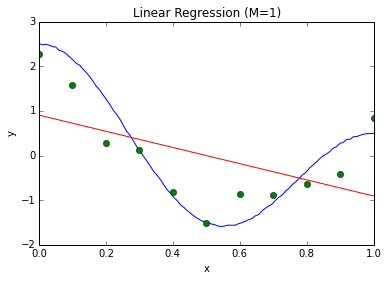

In [755]:
plt.plot(xtrue,ytrue)
plt.plot(X,Y,'o')
plt.plot(xtrue,fValue1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression (M=1)')
#plt.show()
pl.savefig('../ImageFiles/HW1/PolyBasis1.pdf')

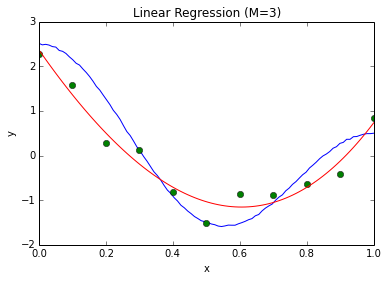

In [756]:
plt.plot(xtrue,ytrue)
plt.plot(X,Y,'o')
plt.plot(xtrue,fValue3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression (M=3)')
#plt.show()
pl.savefig('../ImageFiles/HW1/PolyBasis3.pdf')

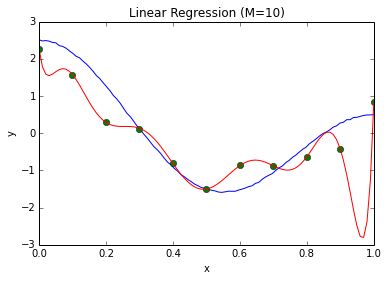

In [757]:
plt.plot(xtrue,ytrue)
plt.plot(X,Y,'o')
plt.plot(xtrue,fValue10)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression (M=10)')
#plt.show()
pl.savefig('../ImageFiles/HW1/PolyBasis10.pdf')

# SSE

In [777]:
def SSEPolynomialBasis(weight,X,y):
    error = np.inner(X,np.transpose(weight)) - y
    SSE =np.inner(error,np.transpose(error))
    SSEderivative = 2*np.inner(np.transpose(X),error)
    return(SSE,SSEderivative)

In [778]:
# Plotting the SSE polynomial basis fnction


In [851]:
weights0 = LBFRegression(X,Y,0)[0]
print weights0
m = 0
designMat = np.zeros((len(X),m+1))
for i in range(m+1):
    designMat[:,i] = [a**i for a in X]
designMat
SSEPolynomialBasis(weights0,designMat,Y)
SSEPolynomialBasis(0.002,designMat,Y)
#type(weights0)
type(weights0)

[-0.00087273]


numpy.ndarray

In [852]:
SSEPolynomialBasis(weights0-0.1,designMat,Y)

(13.586960001818182, array([-2.2]))

In [853]:
np.linalg.norm(SSEPolynomialBasis(weights0,designMat,Y)[1])

6.6613381477509392e-16

In [854]:
finiteDifference(SSEPolynomialBasis,weights0,0.02,designMat,Y)

[8.8817841970012523e-14]

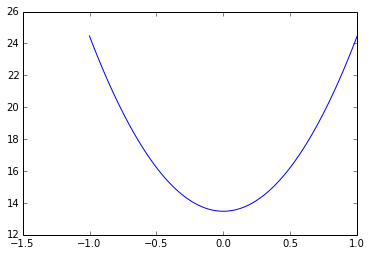

In [855]:
rangeOfValues = np.linspace(-1,1,100)
Value0 = []
for i in rangeOfValues:
    
    Value0.append(SSEPolynomialBasis(weights0+i,designMat,Y)[0]) 
#print Value0
#print rangeOfValues
SSEPolynomialBasis(weights0+0.001,designMat,Y)[1]
plt.plot(rangeOfValues+weights0,Value0)

In [856]:
# Compare bacth gradient descent for initial gues, steps and the convergence threshold

In [962]:
NGAnalyticSoln = weights0
SP1 =NGAnalyticSoln +  np.random.normal(1,1,len(NGAnalyticSoln))
SP2 =NGAnalyticSoln +  np.random.normal(5,1,len(NGAnalyticSoln))
SP3 =NGAnalyticSoln +  np.random.normal(10,1,len(NGAnalyticSoln))
step = 1/np.linalg.norm(SSEPolynomialBasis(SP1,designMat,Y)[1])

SP1output =  batchGradientDiscent(SSEPolynomialBasis,SP1,step,1e-8,1000,designMat,Y)
step = 1/np.linalg.norm(SSEPolynomialBasis(SP2,designMat,Y)[1])
SP2output =  batchGradientDiscent(SSEPolynomialBasis,SP2,step,1e-8,1000,designMat,Y)
step = 1/np.linalg.norm(SSEPolynomialBasis(SP3,designMat,Y)[1])
SP3output =  batchGradientDiscent(SSEPolynomialBasis,SP3,step,1e-8,1000,designMat,Y)

Iterations0 = [SP1output[1],SP2output[3],SP3output[3] ]

#SP3output
SP3output[1]
W1 = ['1','5','10']
Iterations0[1]
a = SP1output[1]
b = SP2output[1]
c = SP3output[1]

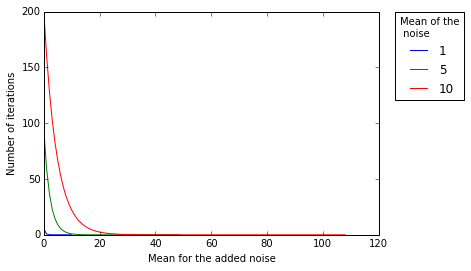

In [968]:
#plt.plot(W1,Iterations)
plt.plot(range(len(a)),a,label='1')
plt.plot(range(len(b)),b,label='5')
plt.plot(range(len(c)),c,label='10')
#plt.plot(range(len(RRLambda0_5M10)),RRLambda0_5M10,label='$\lambda$ = 0.5')
#plt.plot(range(len(RRLambda1M10)),RRLambda1M10,label='$\lambda$ = 1')
#plt.plot(range(len(RRLambda2M10)),RRLambda2M10,label='$\lambda$ =2')
#plt.plot(range(len(RRLambda5M10)),RRLambda5M10,label='$\lambda$ = 5')
#plt.xticks(range(len(W1)),W1, size='small')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,title = "Mean of the \n noise")
plt.xlabel('Mean for the added noise')
plt.ylabel('Number of iterations')
#plt.yscale('log')
plt.show()

In [ ]:
# Generate Plots for all these

In [971]:
# Comparing step sizes
NGAnalyticSoln = weights0
SP3 =NGAnalyticSoln +  np.random.normal(10,1,len(NGAnalyticSoln))
step = 1/np.linalg.norm(SSEPolynomialBasis(SP3,designMat,Y)[1])
step1 = step
step2 = step*5
step3 = step*10
step4 = step*15
step5 = step*20

step1Iter = []
step2Iter = []
step3Iter = []
step4Iter = []
#for i in range(10):
SP1output =  batchGradientDiscent(SSEPolynomialBasis,SP3,step,1e-8,1000,designMat,Y)
SP2output =  batchGradientDiscent(SSEPolynomialBasis,SP3,step2,1e-8,1000,designMat,Y)

SP3output =  batchGradientDiscent(SSEPolynomialBasis,SP3,step3,1e-8,1000,designMat,Y)
SP4output =  batchGradientDiscent(SSEPolynomialBasis,SP3,step4,1e-8,1000,designMat,Y)
    
#SP5output =  batchGradientDiscent(SSEPolynomialBasis,SP3,step5,1e-8,1000,designMat,Y)
#step6 = step*25
#SP5output =  batchGradientDiscent(SSEPolynomialBasis,SP3,step6,1e-8,1000,designMat,Y)
#step7 = step*7
#SP5output =  batchGradientDiscent(SSEPolynomialBasis,SP3,step7,1e-8,1000,designMat,Y)
#step8 = step*20
#SP5output =  batchGradientDiscent(SSEPolynomialBasis,SP3,step8,1e-8,1000,designMat,Y)
a =  SP1output[1]
b =  SP2output[1]
c =  SP3output[1]
d =  SP4output[1]

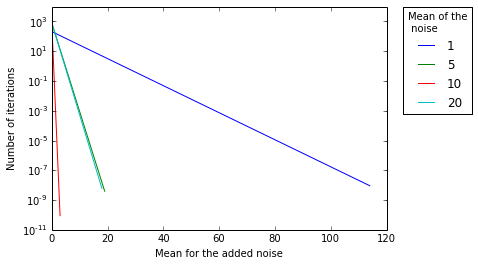

In [974]:
plt.plot(range(len(a)),a,label='1')
plt.plot(range(len(b)),b,label='5')
plt.plot(range(len(c)),c,label='10')
plt.plot(range(len(d)),d,label='20')
#plt.plot(range(len(RRLambda0_5M10)),RRLambda0_5M10,label='$\lambda$ = 0.5')
#plt.plot(range(len(RRLambda1M10)),RRLambda1M10,label='$\lambda$ = 1')
#plt.plot(range(len(RRLambda2M10)),RRLambda2M10,label='$\lambda$ =2')
#plt.plot(range(len(RRLambda5M10)),RRLambda5M10,label='$\lambda$ = 5')
#plt.xticks(range(len(W1)),W1, size='small')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,title = "Mean of the \n noise")
plt.xlabel('Mean for the added noise')
plt.ylabel('Number of iterations')
plt.yscale('log')
plt.show()

In [987]:
# Converegnce Threshold
a = batchGradientDiscent(SSEPolynomialBasis,SP3,step,1e-2,1000,designMat,Y)[3]
b = batchGradientDiscent(SSEPolynomialBasis,SP3,step,1e-4,1000,designMat,Y)[3]
c  = batchGradientDiscent(SSEPolynomialBasis,SP3,step,1e-6,1000,designMat,Y)[3]
d  = batchGradientDiscent(SSEPolynomialBasis,SP3,step,1e-8,1000,designMat,Y)[3]
iteration0 = [a,b,c,d]
W1 = ['1e-2','1e-4','1e-8','1e-10']

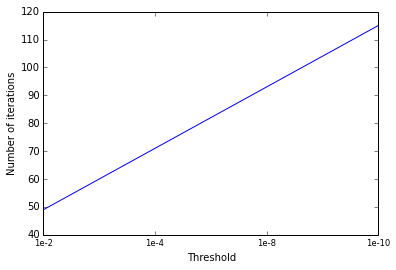

In [989]:
plt.plot(range(len(iteration0)),iteration0)

#plt.plot(range(len(RRLambda0_5M10)),RRLambda0_5M10,label='$\lambda$ = 0.5')
#plt.plot(range(len(RRLambda1M10)),RRLambda1M10,label='$\lambda$ = 1')
#plt.plot(range(len(RRLambda2M10)),RRLambda2M10,label='$\lambda$ =2')
#plt.plot(range(len(RRLambda5M10)),RRLambda5M10,label='$\lambda$ = 5')
plt.xticks(range(len(W1)),W1, size='small')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,title = "Mean of the \n noise")
plt.xlabel('Threshold')
plt.ylabel('Number of iterations')
#plt.yscale('log')
plt.show()

In [1011]:
weights1 = LBFRegression(X,Y,1)[0]
m = 1
designMat = np.zeros((len(X),m+1))
for i in range(m+1):
    designMat[:,i] = [a**i for a in X]
print designMat,Y
SSEPolynomialBasis(weights1,designMat,Y)
#print weights1

[[ 1.   0. ]
 [ 1.   0.1]
 [ 1.   0.2]
 [ 1.   0.3]
 [ 1.   0.4]
 [ 1.   0.5]
 [ 1.   0.6]
 [ 1.   0.7]
 [ 1.   0.8]
 [ 1.   0.9]
 [ 1.   1. ]] [ 2.2748  1.5728  0.2885  0.1237 -0.81   -1.5123 -0.8655 -0.8766 -0.6274
 -0.4159  0.8383]


(9.8619830089999994, array([  0.00000000e+00,   4.44089210e-16]))

In [1012]:
np.linalg.norm(SSEPolynomialBasis(weights1,designMat,Y)[1])

4.4408920985006262e-16

In [1013]:
Sp = [10,10]
step = 1/np.linalg.norm(SSEPolynomialBasis(Sp,designMat,Y)[1])
print step
batchGradientDiscent(SSEPolynomialBasis,Sp,step,1e-8,1000,designMat,Y)

0.0026225784646


([353.35506167059208,
  327.4575420878013,
  303.4611836169675,
  281.22663657333231,
  260.62478008363047,
  241.53597225615769,
  223.84935538073444,
  207.4622121227909,
  192.2793689716261,
  178.21264347694711,
  165.18033206165097,
  153.10673543394086,
  141.9217188396033,
  131.56030459687699,
  121.96229454294526,
  113.07192019375395,
  104.83751857855803,
  97.211231858230306,
  90.148728972741438,
  83.608947689094919,
  77.553855537063228,
  71.948228226958207,
  66.759444241969859,
  61.957294387877234,
  57.513805165707062,
  53.403074908717194,
  49.601121694460993,
  46.085742106236886,
  42.83637997661986,
  39.834004299804157,
  37.060995550126492,
  34.50103969256871,
  32.139029218703378,
  29.960970590171186,
  27.953897523366024,
  26.105789605751532,
  24.405495798377054,
  22.8426624526872,
  21.407665553931299,
  20.091546998424143,
  18.885954815696607,
  17.78308735469902,
  16.775641558077332,
  15.856765539378245,
  15.020015741633014,
  14.25931897803844,

In [1014]:
NGAnalyticSoln = weights1
SP1 =NGAnalyticSoln +  np.random.normal(1,1,len(NGAnalyticSoln))
SP2 =NGAnalyticSoln +  np.random.normal(5,1,len(NGAnalyticSoln))
SP3 =NGAnalyticSoln +  np.random.normal(10,1,len(NGAnalyticSoln))
step = 1/np.linalg.norm(SSEPolynomialBasis(SP1,designMat,Y)[1])

SP1output =  batchGradientDiscent(SSEPolynomialBasis,SP1,step,1e-8,1000,designMat,Y)
step = 1/np.linalg.norm(SSEPolynomialBasis(SP2,designMat,Y)[1])
SP2output =  batchGradientDiscent(SSEPolynomialBasis,SP2,step,1e-8,1000,designMat,Y)
step = 1/np.linalg.norm(SSEPolynomialBasis(SP3,designMat,Y)[1])
SP3output =  batchGradientDiscent(SSEPolynomialBasis,SP3,step,1e-8,1000,designMat,Y)
W1 = ['1','5','10']
Iterations0[1]
a = SP1output[1]
b = SP2output[1]
c = SP3output[1]

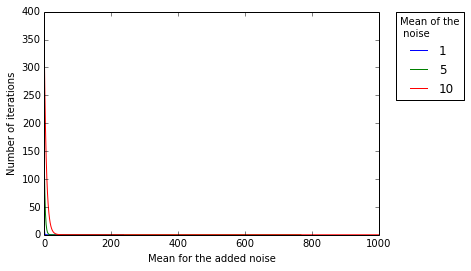

In [1015]:
plt.plot(range(len(a)),a,label='1')
plt.plot(range(len(b)),b,label='5')
plt.plot(range(len(c)),c,label='10')
#plt.plot(range(len(RRLambda0_5M10)),RRLambda0_5M10,label='$\lambda$ = 0.5')
#plt.plot(range(len(RRLambda1M10)),RRLambda1M10,label='$\lambda$ = 1')
#plt.plot(range(len(RRLambda2M10)),RRLambda2M10,label='$\lambda$ =2')
#plt.plot(range(len(RRLambda5M10)),RRLambda5M10,label='$\lambda$ = 5')
#plt.xticks(range(len(W1)),W1, size='small')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,title = "Mean of the \n noise")
plt.xlabel('Mean for the added noise')
plt.ylabel('Number of iterations')
#plt.yscale('log')
plt.show()

In [1016]:
NGAnalyticSoln = weights1
SP3 =NGAnalyticSoln +  np.random.normal(10,1,len(NGAnalyticSoln))
step = 1/np.linalg.norm(SSEPolynomialBasis(SP3,designMat,Y)[1])
step1 = step
step2 = step*5
step3 = step*10
step4 = step*15
step5 = step*20

step1Iter = []
step2Iter = []
step3Iter = []
step4Iter = []
#for i in range(10):
SP1output =  batchGradientDiscent(SSEPolynomialBasis,SP3,step,1e-8,1000,designMat,Y)
SP2output =  batchGradientDiscent(SSEPolynomialBasis,SP3,step2,1e-8,1000,designMat,Y)

SP3output =  batchGradientDiscent(SSEPolynomialBasis,SP3,step3,1e-8,1000,designMat,Y)
SP4output =  batchGradientDiscent(SSEPolynomialBasis,SP3,step4,1e-8,1000,designMat,Y)
    
#SP5output =  batchGradientDiscent(SSEPolynomialBasis,SP3,step5,1e-8,1000,designMat,Y)
#step6 = step*25
#SP5output =  batchGradientDiscent(SSEPolynomialBasis,SP3,step6,1e-8,1000,designMat,Y)
#step7 = step*7
#SP5output =  batchGradientDiscent(SSEPolynomialBasis,SP3,step7,1e-8,1000,designMat,Y)
#step8 = step*20
#SP5output =  batchGradientDiscent(SSEPolynomialBasis,SP3,step8,1e-8,1000,designMat,Y)
a =  SP1output[1]
b =  SP2output[1]
c =  SP3output[1]
d =  SP4output[1]

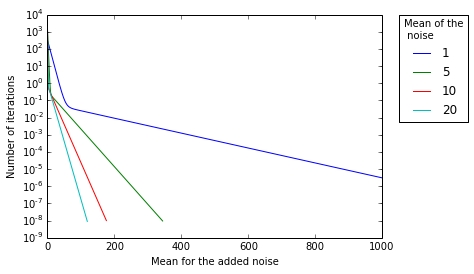

In [1017]:
plt.plot(range(len(a)),a,label='1')
plt.plot(range(len(b)),b,label='5')
plt.plot(range(len(c)),c,label='10')
plt.plot(range(len(d)),d,label='20')
#plt.plot(range(len(RRLambda0_5M10)),RRLambda0_5M10,label='$\lambda$ = 0.5')
#plt.plot(range(len(RRLambda1M10)),RRLambda1M10,label='$\lambda$ = 1')
#plt.plot(range(len(RRLambda2M10)),RRLambda2M10,label='$\lambda$ =2')
#plt.plot(range(len(RRLambda5M10)),RRLambda5M10,label='$\lambda$ = 5')
#plt.xticks(range(len(W1)),W1, size='small')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,title = "Mean of the \n noise")
plt.xlabel('Mean for the added noise')
plt.ylabel('Number of iterations')
plt.yscale('log')
plt.show()

In [1018]:
# Converegnce Threshold
a = batchGradientDiscent(SSEPolynomialBasis,SP3,step,1e-2,2000,designMat,Y)[3]
b = batchGradientDiscent(SSEPolynomialBasis,SP3,step,1e-4,2000,designMat,Y)[3]
c  = batchGradientDiscent(SSEPolynomialBasis,SP3,step,1e-6,2000,designMat,Y)[3]
d  = batchGradientDiscent(SSEPolynomialBasis,SP3,step,1e-8,2000,designMat,Y)[3]
iteration0 = [a,b,c,d]
W1 = ['1e-2','1e-4','1e-8','1e-10']
c

1114

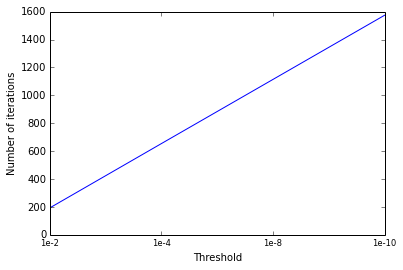

In [1019]:
plt.plot(range(len(iteration0)),iteration0)

#plt.plot(range(len(RRLambda0_5M10)),RRLambda0_5M10,label='$\lambda$ = 0.5')
#plt.plot(range(len(RRLambda1M10)),RRLambda1M10,label='$\lambda$ = 1')
#plt.plot(range(len(RRLambda2M10)),RRLambda2M10,label='$\lambda$ =2')
#plt.plot(range(len(RRLambda5M10)),RRLambda5M10,label='$\lambda$ = 5')
plt.xticks(range(len(W1)),W1, size='small')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,title = "Mean of the \n noise")
plt.xlabel('Threshold')
plt.ylabel('Number of iterations')
#plt.yscale('log')
plt.show()

In [1020]:
np.linalg.norm(finiteDifference(SSEPolynomialBasis,weights1,0.02,designMat,Y))

0.0

In [1021]:
weights3 = LBFRegression(X,Y,3)[0]
m = 3
designMat = np.zeros((len(X),m+1))
for i in range(m+1):
    designMat[:,i] = [a**i for a in X]

SSEPolynomialBasis(weights3,designMat,Y)

(0.65484574996503375,
 array([  2.72337708e-13,   1.61315405e-13,   1.19598775e-13,
          1.04971587e-13]))

In [1022]:
np.linalg.norm(SSEPolynomialBasis(weights3,designMat,Y)[1])

3.5427868739665491e-13

In [1023]:
np.linalg.norm(finiteDifference(SSEPolynomialBasis,weights3,0.02,designMat,Y))

3.1675423656645454e-13

In [1024]:
NGAnalyticSoln = weights3
SP1 =NGAnalyticSoln +  np.random.normal(1,1,len(NGAnalyticSoln))
SP2 =NGAnalyticSoln +  np.random.normal(5,1,len(NGAnalyticSoln))
SP3 =NGAnalyticSoln +  np.random.normal(10,1,len(NGAnalyticSoln))
step = 1/np.linalg.norm(SSEPolynomialBasis(SP1,designMat,Y)[1])

SP1output =  batchGradientDiscent(SSEPolynomialBasis,SP1,step,1e-8,1000,designMat,Y)
step = 1/np.linalg.norm(SSEPolynomialBasis(SP2,designMat,Y)[1])
SP2output =  batchGradientDiscent(SSEPolynomialBasis,SP2,step,1e-8,1000,designMat,Y)
step = 1/np.linalg.norm(SSEPolynomialBasis(SP3,designMat,Y)[1])
SP3output =  batchGradientDiscent(SSEPolynomialBasis,SP3,step,1e-8,1000,designMat,Y)
W1 = ['1','5','10']
Iterations0[1]
a = SP1output[1]
b = SP2output[1]
c = SP3output[1]

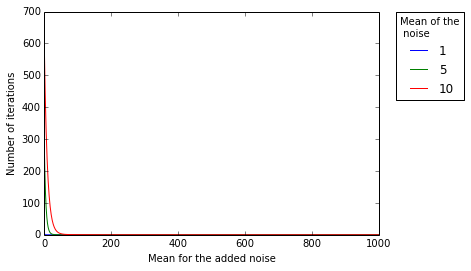

In [1025]:
plt.plot(range(len(a)),a,label='1')
plt.plot(range(len(b)),b,label='5')
plt.plot(range(len(c)),c,label='10')
#plt.plot(range(len(RRLambda0_5M10)),RRLambda0_5M10,label='$\lambda$ = 0.5')
#plt.plot(range(len(RRLambda1M10)),RRLambda1M10,label='$\lambda$ = 1')
#plt.plot(range(len(RRLambda2M10)),RRLambda2M10,label='$\lambda$ =2')
#plt.plot(range(len(RRLambda5M10)),RRLambda5M10,label='$\lambda$ = 5')
#plt.xticks(range(len(W1)),W1, size='small')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,title = "Mean of the \n noise")
plt.xlabel('Mean for the added noise')
plt.ylabel('Number of iterations')
#plt.yscale('log')
plt.show()

In [1028]:
NGAnalyticSoln = weights3
SP3 =NGAnalyticSoln +  np.random.normal(10,1,len(NGAnalyticSoln))
step = 1/np.linalg.norm(SSEPolynomialBasis(SP3,designMat,Y)[1])
step1 = step
step2 = step*5
step3 = step*10
step4 = step*15
step5 = step*20

step1Iter = []
step2Iter = []
step3Iter = []
step4Iter = []
#for i in range(10):
SP1output =  batchGradientDiscent(SSEPolynomialBasis,SP3,step,1e-8,2000,designMat,Y)
SP2output =  batchGradientDiscent(SSEPolynomialBasis,SP3,step2,1e-8,2000,designMat,Y)

SP3output =  batchGradientDiscent(SSEPolynomialBasis,SP3,step3,1e-8,2000,designMat,Y)
SP4output =  batchGradientDiscent(SSEPolynomialBasis,SP3,step4,1e-8,2000,designMat,Y)
    
#SP5output =  batchGradientDiscent(SSEPolynomialBasis,SP3,step5,1e-8,1000,designMat,Y)
#step6 = step*25
#SP5output =  batchGradientDiscent(SSEPolynomialBasis,SP3,step6,1e-8,1000,designMat,Y)
#step7 = step*7
#SP5output =  batchGradientDiscent(SSEPolynomialBasis,SP3,step7,1e-8,1000,designMat,Y)
#step8 = step*20
#SP5output =  batchGradientDiscent(SSEPolynomialBasis,SP3,step8,1e-8,1000,designMat,Y)
a =  SP1output[1]
b =  SP2output[1]
c =  SP3output[1]
d =  SP4output[1]

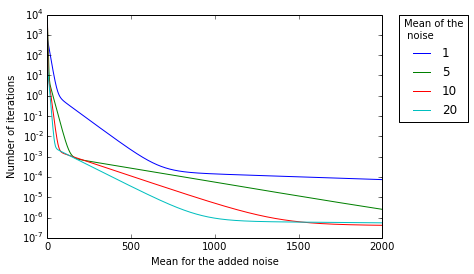

In [1029]:
plt.plot(range(len(a)),a,label='1')
plt.plot(range(len(b)),b,label='5')
plt.plot(range(len(c)),c,label='10')
plt.plot(range(len(d)),d,label='20')
#plt.plot(range(len(RRLambda0_5M10)),RRLambda0_5M10,label='$\lambda$ = 0.5')
#plt.plot(range(len(RRLambda1M10)),RRLambda1M10,label='$\lambda$ = 1')
#plt.plot(range(len(RRLambda2M10)),RRLambda2M10,label='$\lambda$ =2')
#plt.plot(range(len(RRLambda5M10)),RRLambda5M10,label='$\lambda$ = 5')
#plt.xticks(range(len(W1)),W1, size='small')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,title = "Mean of the \n noise")
plt.xlabel('Mean for the added noise')
plt.ylabel('Number of iterations')
plt.yscale('log')
plt.show()

In [1030]:
# Converegnce Threshold
a = batchGradientDiscent(SSEPolynomialBasis,SP3,step,1e-2,2000,designMat,Y)[3]
b = batchGradientDiscent(SSEPolynomialBasis,SP3,step,1e-4,2000,designMat,Y)[3]
c  = batchGradientDiscent(SSEPolynomialBasis,SP3,step,1e-6,2000,designMat,Y)[3]
d  = batchGradientDiscent(SSEPolynomialBasis,SP3,step,1e-8,2000,designMat,Y)[3]
iteration0 = [a,b,c,d]
W1 = ['1e-2','1e-4','1e-8','1e-10']
c

2000

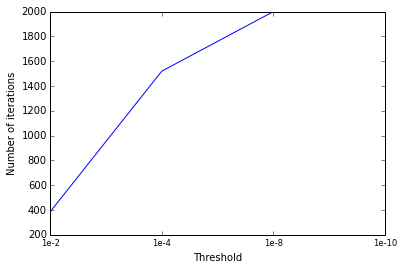

In [1031]:
plt.plot(range(len(iteration0)),iteration0)

#plt.plot(range(len(RRLambda0_5M10)),RRLambda0_5M10,label='$\lambda$ = 0.5')
#plt.plot(range(len(RRLambda1M10)),RRLambda1M10,label='$\lambda$ = 1')
#plt.plot(range(len(RRLambda2M10)),RRLambda2M10,label='$\lambda$ =2')
#plt.plot(range(len(RRLambda5M10)),RRLambda5M10,label='$\lambda$ = 5')
plt.xticks(range(len(W1)),W1, size='small')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,title = "Mean of the \n noise")
plt.xlabel('Threshold')
plt.ylabel('Number of iterations')
#plt.yscale('log')
plt.show()

In [1032]:
weights10 = LBFRegression(X,Y,10)[0]
m = 10
designMat = np.zeros((len(X),m+1))
for i in range(m+1):
    designMat[:,i] = [a**i for a in X]


SSEPolynomialBasis(weights10,designMat,Y)

(0.0011636150697689452,
 array([-0.04220659, -0.07631585, -0.0785371 , -0.07655327, -0.07378075,
        -0.07106037, -0.06860579, -0.06645134, -0.06457771, -0.06295159,
        -0.0615389 ]))

In [1033]:
NGAnalyticSoln = weights10
SP1 =NGAnalyticSoln +  np.random.normal(1,1,len(NGAnalyticSoln))
SP2 =NGAnalyticSoln +  np.random.normal(5,1,len(NGAnalyticSoln))
SP3 =NGAnalyticSoln +  np.random.normal(10,1,len(NGAnalyticSoln))
step = 1/np.linalg.norm(SSEPolynomialBasis(SP1,designMat,Y)[1])

SP1output =  batchGradientDiscent(SSEPolynomialBasis,SP1,step,1e-8,1000,designMat,Y)
step = 1/np.linalg.norm(SSEPolynomialBasis(SP2,designMat,Y)[1])
SP2output =  batchGradientDiscent(SSEPolynomialBasis,SP2,step,1e-8,1000,designMat,Y)
step = 1/np.linalg.norm(SSEPolynomialBasis(SP3,designMat,Y)[1])
SP3output =  batchGradientDiscent(SSEPolynomialBasis,SP3,step,1e-8,1000,designMat,Y)
W1 = ['1','5','10']
Iterations0[1]
a = SP1output[1]
b = SP2output[1]
c = SP3output[1]

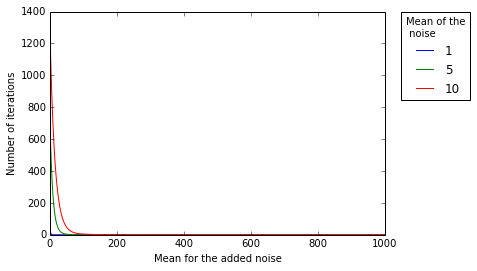

In [1034]:
plt.plot(range(len(a)),a,label='1')
plt.plot(range(len(b)),b,label='5')
plt.plot(range(len(c)),c,label='10')
#plt.plot(range(len(RRLambda0_5M10)),RRLambda0_5M10,label='$\lambda$ = 0.5')
#plt.plot(range(len(RRLambda1M10)),RRLambda1M10,label='$\lambda$ = 1')
#plt.plot(range(len(RRLambda2M10)),RRLambda2M10,label='$\lambda$ =2')
#plt.plot(range(len(RRLambda5M10)),RRLambda5M10,label='$\lambda$ = 5')
#plt.xticks(range(len(W1)),W1, size='small')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,title = "Mean of the \n noise")
plt.xlabel('Mean for the added noise')
plt.ylabel('Number of iterations')
#plt.yscale('log')
plt.show()

In [1035]:
NGAnalyticSoln = weights10
SP3 =NGAnalyticSoln +  np.random.normal(10,1,len(NGAnalyticSoln))
step = 1/np.linalg.norm(SSEPolynomialBasis(SP3,designMat,Y)[1])
step1 = step
step2 = step*5
step3 = step*10
step4 = step*15
step5 = step*20

step1Iter = []
step2Iter = []
step3Iter = []
step4Iter = []
#for i in range(10):
SP1output =  batchGradientDiscent(SSEPolynomialBasis,SP3,step,1e-8,1000,designMat,Y)
SP2output =  batchGradientDiscent(SSEPolynomialBasis,SP3,step2,1e-8,1000,designMat,Y)

SP3output =  batchGradientDiscent(SSEPolynomialBasis,SP3,step3,1e-8,1000,designMat,Y)
SP4output =  batchGradientDiscent(SSEPolynomialBasis,SP3,step4,1e-8,1000,designMat,Y)
    
#SP5output =  batchGradientDiscent(SSEPolynomialBasis,SP3,step5,1e-8,1000,designMat,Y)
#step6 = step*25
#SP5output =  batchGradientDiscent(SSEPolynomialBasis,SP3,step6,1e-8,1000,designMat,Y)
#step7 = step*7
#SP5output =  batchGradientDiscent(SSEPolynomialBasis,SP3,step7,1e-8,1000,designMat,Y)
#step8 = step*20
#SP5output =  batchGradientDiscent(SSEPolynomialBasis,SP3,step8,1e-8,1000,designMat,Y)
a =  SP1output[1]
b =  SP2output[1]
c =  SP3output[1]
d =  SP4output[1]

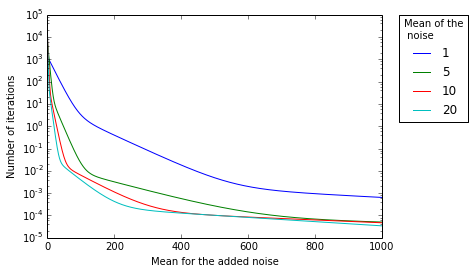

In [1036]:
plt.plot(range(len(a)),a,label='1')
plt.plot(range(len(b)),b,label='5')
plt.plot(range(len(c)),c,label='10')
plt.plot(range(len(d)),d,label='20')
#plt.plot(range(len(RRLambda0_5M10)),RRLambda0_5M10,label='$\lambda$ = 0.5')
#plt.plot(range(len(RRLambda1M10)),RRLambda1M10,label='$\lambda$ = 1')
#plt.plot(range(len(RRLambda2M10)),RRLambda2M10,label='$\lambda$ =2')
#plt.plot(range(len(RRLambda5M10)),RRLambda5M10,label='$\lambda$ = 5')
#plt.xticks(range(len(W1)),W1, size='small')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,title = "Mean of the \n noise")
plt.xlabel('Mean for the added noise')
plt.ylabel('Number of iterations')
plt.yscale('log')
plt.show()

In [1051]:
# Converegnce Threshold
a = batchGradientDiscent(SSEPolynomialBasis,SP3,step,1e-2,30000,designMat,Y)[3]
b = batchGradientDiscent(SSEPolynomialBasis,SP3,step,1e-4,30000,designMat,Y)[3]
c  = batchGradientDiscent(SSEPolynomialBasis,SP3,step,1e-6,30000,designMat,Y)[3]
d  = batchGradientDiscent(SSEPolynomialBasis,SP3,step,1e-8,200000,designMat,Y)[3]
iteration0 = [a,b,c,d]
W1 = ['1e-2','1e-4','1e-8','1e-10']
d
batchGradientDiscent(SSEPolynomialBasis,SP3,step,1e-8,200000,designMat,Y)

([1292.3767584051798,
  1248.7165659452066,
  1206.5447122418925,
  1165.8107083549914,
  1126.4657822953804,
  1088.4628206674781,
  1051.7563123350778,
  1016.3022939696979,
  982.05829742968524,
  948.98329899526516,
  917.03767024685135,
  886.18313065390953,
  856.3827017639835,
  827.60066294769342,
  799.80250864660343,
  772.95490705305474,
  747.02566022144742,
  721.98366549270384,
  697.7988782806832,
  674.44227605379024,
  651.88582357361986,
  630.10243934545974,
  609.06596309538998,
  588.75112449732171,
  569.13351279645565,
  550.18954759543897,
  531.89645055775725,
  514.23221805432684,
  497.17559479119069,
  480.70604829117644,
  464.80374418634722,
  449.4495224747559,
  434.62487440902231,
  420.31192031021334,
  406.49338802746831,
  393.15259215505023,
  380.27341396219913,
  367.84028195102059,
  355.83815310165937,
  344.25249474176866,
  333.06926699446103,
  322.274905820085,
  311.85630663033709,
  301.80080847295267,
  292.09617865709419,
  282.730597962

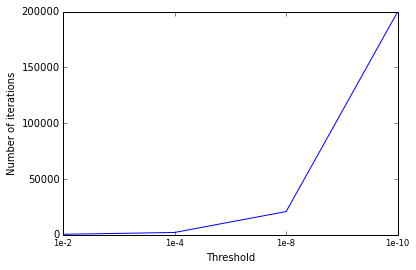

In [1052]:
plt.plot(range(len(iteration0)),iteration0)

#plt.plot(range(len(RRLambda0_5M10)),RRLambda0_5M10,label='$\lambda$ = 0.5')
#plt.plot(range(len(RRLambda1M10)),RRLambda1M10,label='$\lambda$ = 1')
#plt.plot(range(len(RRLambda2M10)),RRLambda2M10,label='$\lambda$ =2')
#plt.plot(range(len(RRLambda5M10)),RRLambda5M10,label='$\lambda$ = 5')
plt.xticks(range(len(W1)),W1, size='small')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,title = "Mean of the \n noise")
plt.xlabel('Threshold')
plt.ylabel('Number of iterations')
#plt.yscale('log')
plt.show()

In [394]:
np.linalg.norm(SSEPolynomialBasis(weights10,designMat,Y)[1])

0.22620768249878792

In [402]:
np.linalg.norm(finiteDifference(SSEPolynomialBasis,weights10,0.5,designMat,Y))

0.22620768254986937

In [828]:
NGAnalyticSoln = weights10
SP1 =NGAnalyticSoln +  np.random.normal(1,1,len(NGAnalyticSoln))
SP2 =NGAnalyticSoln +  np.random.normal(5,1,len(NGAnalyticSoln))
SP3 =NGAnalyticSoln +  np.random.normal(10,1,len(NGAnalyticSoln))
step = 1/np.linalg.norm(SSEPolynomialBasis(SP1,designMat,Y)[1])

SP1output =  batchGradientDiscent(SSEPolynomialBasis,SP1,step,1e-8,1000,designMat,Y)
step = 1/np.linalg.norm(SSEPolynomialBasis(SP2,designMat,Y)[1])
SP2output =  batchGradientDiscent(SSEPolynomialBasis,SP2,step,1e-8,1000,designMat,Y)
step = 1/np.linalg.norm(SSEPolynomialBasis(SP3,designMat,Y)[1])
SP3output =  batchGradientDiscent(SSEPolynomialBasis,SP3,step,1e-8,1000,designMat,Y)

ValueError: shapes (11,1) and (11,) not aligned: 1 (dim 1) != 11 (dim 0)

In [ ]:
weight3high = weights3+0.2
weight3Low = weights3-0.2
a = SSEPolynomialBasis(weight3high,designMat,ytrue)[0]
b = SSEPolynomialBasis(weight3Low,designMat,ytrue)[0]
print a,b

Numerical derviative for the SSE

In [401]:
np.linalg.norm(finiteDifference(SSEPolynomialBasis,weights10,0.5,designMat,Y))

0.22620768254986934

In [665]:
step =1/(np.linalg.norm(SSEPolynomialBasis(weights0+1,designMat,Y)[1]))
batchGradientDiscent(SSEPolynomialBasis,weights0+100,step,1e-28,100,designMat,Y)
print step

0.0454545454545


# 2.3 Cosine basis function

In [441]:
def CosBFRegression(X,y,m):
    designMat = np.zeros((len(X),m))
    for i in range(1,m+1):
        
        #print np.cos(i*np.pi*X)
        designMat[:,i-1] = np.cos(i*np.pi*X)
        
        
    mle = np.inner(np.dot(np.linalg.inv(np.dot(np.transpose(designMat),designMat)),np.transpose(designMat)),y)
    fittedValues = np.dot(designMat,np.transpose(mle))
    return(mle)

In [442]:
Y

array([ 2.2748,  1.5728,  0.2885,  0.1237, -0.81  , -1.5123, -0.8655,
       -0.8766, -0.6274, -0.4159,  0.8383])

In [443]:
cosBasis1 = np.append(CosBFRegression(X,Y,1),[0]*7)
cosBasis2 = np.append(CosBFRegression(X,Y,2),[0]*6)
cosBasis3 = np.append(CosBFRegression(X,Y,3),[0]*5)
cosBasis4 = np.append(CosBFRegression(X,Y,4),[0]*4)
cosBasis5 = np.append(CosBFRegression(X,Y,5),[0]*3)
cosBasis6 = np.append(CosBFRegression(X,Y,6),[0]*2)
cosBasis7 = np.append(CosBFRegression(X,Y,7),[0]*1)
cosBasis8 = np.append(CosBFRegression(X,Y,8),[0]*0)

In [444]:
TrueCosBasis = np.array([1,1.5,0,0,0,0,0,0])
def euclideanDistanceTrueCos(Vector):
    return np.linalg.norm(TrueCosBasis - Vector)
    
EuclideanDistance = [euclideanDistanceTrueCos(cosBasis1),euclideanDistanceTrueCos(cosBasis2),euclideanDistanceTrueCos(cosBasis3),euclideanDistanceTrueCos(cosBasis4),
                    euclideanDistanceTrueCos(cosBasis5),euclideanDistanceTrueCos(cosBasis6),euclideanDistanceTrueCos(cosBasis7),euclideanDistanceTrueCos(cosBasis8)]
EuclideanDistance 
MVector = range(1,9)
MVector

[1, 2, 3, 4, 5, 6, 7, 8]

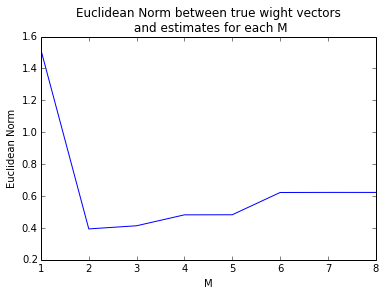

In [447]:
plt.plot(MVector,EuclideanDistance)

plt.xlabel('M')
plt.ylabel('Euclidean Norm')
plt.title('Euclidean Norm between true wight vectors\n and estimates for each M')

#plt.show()
pl.savefig('../ImageFiles/HW1/CosBasisDifference.pdf')

In [ ]:
np.cos(4*np.pi*X)

# Ridge Regression 

In [ ]:
# Data for question 3

import pdb
import random
import pylab as pl

# X is an array of N data points (one dimensional for now), that is, NX1
# Y is a Nx1 column vector of data values

def getData(name):
    data = pl.loadtxt(name)
    # Returns column matrices
    X = data[0:1].T
    Y = data[1:2].T
    return X, Y

def regressAData():
    return getData('../DataFiles/HW1/regressA_train.txt')

def regressBData():
    return getData('../DataFiles/HW1/regressB_train.txt')

def validateData():
    return getData('../DataFiles/HW1/regress_validate.txt')

In [ ]:
def ridgeRegression(X,y,lambdaShrink,m):
    designMat = np.zeros((len(X),m+1))
    for i in range(m+1):
        #print([a**i for a in X])
        designMat[:,i] = [a**i for a in X]
        designMat[:,i] = [j - np.mean(y) for j in designMat[:,i]] # Centering X's
        
    y = y.ravel() 
    
    yCentered = [j - np.mean(y) for j in y] # Centering y's
    
    mle = np.inner(np.dot(np.linalg.inv(np.dot(np.transpose(designMat),designMat)+lambdaShrink*np.identity(m+1)),np.transpose(designMat)),yCentered)
    fittedValues = np.dot(designMat,np.transpose(mle))
    return(mle,fittedValues)
    

Ridge regression fit for M = 1 for various lamdas

In [ ]:
RRLambda0_1M1 = ridgeRegression(X,Y,0.1,1)[0]
RRLambda0_5M1 = ridgeRegression(X,Y,0.5,1)[0]
RRLambda1M1 = ridgeRegression(X,Y,1,1)[0]
RRLambda2M1 = ridgeRegression(X,Y,2,1)[0]
RRLambda5M1 = ridgeRegression(X,Y,5,1)[0]
W1 = ['w0','w1']
RRLambda2M1

In [ ]:
#plt.bar(range(len(t12)), t12, align='center')
#plt.xticks(range(len(t12)), t11, size='small')
#plt.show()
plt.plot(range(len(RRLambda0_1M1)),RRLambda0_1M1,label='$\lambda$ = 0.1')
plt.plot(range(len(RRLambda0_5M1)),RRLambda0_5M1,label='$\lambda$ = 0.5')
plt.plot(range(len(RRLambda1M1)),RRLambda1M1,label='$\lambda$ = 1')
plt.plot(range(len(RRLambda2M1)),RRLambda2M1,label='$\lambda$ = 2')
plt.plot(range(len(RRLambda5M1)),RRLambda5M1,label='$\lambda$ = 5')
plt.xticks(range(len(W1)),W1, size='small')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Ridge regression fit for M = 3 for various lamdas

In [ ]:
RRLambda0_1M3 = ridgeRegression(X,Y,0.1,3)[0]
RRLambda0_5M3 = ridgeRegression(X,Y,0.5,3)[0]
RRLambda1M3 = ridgeRegression(X,Y,1,3)[0]
RRLambda2M3 = ridgeRegression(X,Y,2,3)[0]
RRLambda5M3 = ridgeRegression(X,Y,5,3)[0]
W1 = ['w0','w1','w2','w3']
RRLambda2M1

In [ ]:
# Adding label to the plot
plt.plot(range(len(RRLambda0_1M3)),RRLambda0_1M3,label='$\lambda$ = 0.1')
plt.plot(range(len(RRLambda0_5M3)),RRLambda0_5M3,label='$\lambda$ = 0.5')
plt.plot(range(len(RRLambda1M3)),RRLambda1M3,label='$\lambda$ = 1')
plt.plot(range(len(RRLambda2M3)),RRLambda2M3,label='$\lambda$ =2')
plt.plot(range(len(RRLambda5M3)),RRLambda5M3,label='$\lambda$ = 5')
plt.xticks(range(len(W1)),W1, size='small')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Ridge regression fit for M = 5 for various lamdas

In [ ]:
RRLambda0_1M5 = ridgeRegression(X,Y,0.1,5)[0]
RRLambda0_5M5 = ridgeRegression(X,Y,0.5,5)[0]
RRLambda1M5 = ridgeRegression(X,Y,1,5)[0]
RRLambda2M5 = ridgeRegression(X,Y,2,5)[0]
RRLambda5M5 = ridgeRegression(X,Y,5,5)[0]
W1 = ['w0','w1','w2','w3','w4','w5']
RRLambda2M1

In [ ]:
# Adding label to the plot
plt.plot(range(len(RRLambda0_1M5)),RRLambda0_1M5,label='$\lambda$ = 0.1')
plt.plot(range(len(RRLambda0_5M5)),RRLambda0_5M5,label='$\lambda$ = 0.5')
plt.plot(range(len(RRLambda1M5)),RRLambda1M5,label='$\lambda$ = 1')
plt.plot(range(len(RRLambda2M5)),RRLambda2M5,label='$\lambda$ =2')
plt.plot(range(len(RRLambda5M5)),RRLambda5M5,label='$\lambda$ = 5')
plt.xticks(range(len(W1)),W1, size='small')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Ridge regression fit for M = 10 for various lamdas

In [ ]:
RRLambda0_1M10 = ridgeRegression(X,Y,0.1,10)[0]
RRLambda0_5M10 = ridgeRegression(X,Y,0.5,10)[0]
RRLambda1M10 = ridgeRegression(X,Y,1,10)[0]
RRLambda2M10 = ridgeRegression(X,Y,2,10)[0]
RRLambda5M10 = ridgeRegression(X,Y,5,10)[0]
W1 = ['w0','w1','w2','w3','w4','w5','w6','w7','w8','w9','w10']
RRLambda2M1

In [ ]:
# Adding label to the plot
plt.plot(range(len(RRLambda0_1M10)),RRLambda0_1M10,label='$\lambda$ = 0.1')
plt.plot(range(len(RRLambda0_5M10)),RRLambda0_5M10,label='$\lambda$ = 0.5')
plt.plot(range(len(RRLambda1M10)),RRLambda1M10,label='$\lambda$ = 1')
plt.plot(range(len(RRLambda2M10)),RRLambda2M10,label='$\lambda$ =2')
plt.plot(range(len(RRLambda5M10)),RRLambda5M10,label='$\lambda$ = 5')
plt.xticks(range(len(W1)),W1, size='small')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Test 1

In [ ]:
Train1_X = regressAData()[0]
Train1_Y = regressAData()[1]
Test1_X = regressBData()[0]
Test1_Y = regressBData()[1]
valid1_X =validateData()[0]
valid1_Y = validateData()[1]

In [ ]:
def LBFRidgeRegression(theta,X,y,lambda_shrinkage):
    params = len(theta)
    #print (m)
    designMat = np.zeros((len(X),params))
    for i in range(params):
        #print([a**i for a in X])
        designMat[:,i] = [a**i for a in X]
        #designMatTemp[:,i] = [a**i for a in X]
        designMat[:,i] = [j - np.mean(y) for j in designMat[:,i]] # Centering X's
    
    y = y.ravel() 
    yCentered = [j - np.mean(y) for j in y]  # Centering y's
    
    
    fittedValues = np.dot(designMat,np.transpose(theta))
    fittedDifference = [a - b for a, b in zip(fittedValues,yCentered)]
    RSS = sum(a**2 for a in fittedDifference)+lambda_shrinkage*np.dot(theta,np.transpose(theta))
    return(fittedValues,RSS)

In [ ]:
# Lambdas to be tested are 0.1,0.5,1,2,3,5 and the M's are 1,3,5,10
ridgeParam = ridgeRegression(valid1_X,valid1_Y,0.6,1)[0]

#ridgeParam

In [ ]:
LBFRidgeRegression(ridgeParam,valid1_X,valid1_Y,1)[1]

M =  1

In [ ]:
ridgeParamLambda0_1M1 = ridgeRegression(Train1_X,Train1_Y,0.1,1)[0]
ridgeParamLambda0_5M1 = ridgeRegression(Train1_X,Train1_Y,0.5,1)[0]
ridgeParamLambda1M1 = ridgeRegression(Train1_X,Train1_Y,1,1)[0]
ridgeParamLambda2M1 = ridgeRegression(Train1_X,Train1_Y,2,1)[0]
ridgeParamLambda5M1 = ridgeRegression(Train1_X,Train1_Y,5,1)[0]

In [ ]:
errorLambda0_1M1 = LBFRidgeRegression(ridgeParamLambda0_1M1,valid1_X ,valid1_Y,0.1)[1]
errorLambda0_5M1 = LBFRidgeRegression(ridgeParamLambda0_5M1,valid1_X ,valid1_Y,0.5)[1]
errorLambda1M1 = LBFRidgeRegression(ridgeParamLambda1M1,valid1_X ,valid1_Y,1)[1]
errorLambda2M1 = LBFRidgeRegression(ridgeParamLambda2M1,valid1_X ,valid1_Y,2)[1]
errorLambda5M1 = LBFRidgeRegression(ridgeParamLambda5M1,valid1_X ,valid1_Y,5)[1]


M = 3

In [ ]:
ridgeParamLambda0_1M3 = ridgeRegression(Train1_X,Train1_Y,0.1,3)[0]
ridgeParamLambda0_5M3 = ridgeRegression(Train1_X,Train1_Y,0.5,3)[0]
ridgeParamLambda1M3 = ridgeRegression(Train1_X,Train1_Y,1,3)[0]
ridgeParamLambda2M3 = ridgeRegression(Train1_X,Train1_Y,2,3)[0]
ridgeParamLambda5M3 = ridgeRegression(Train1_X,Train1_Y,5,3)[0]

In [ ]:
errorLambda0_1M3 = LBFRidgeRegression(ridgeParamLambda0_1M3,valid1_X ,valid1_Y,0.1)[1]
errorLambda0_5M3 = LBFRidgeRegression(ridgeParamLambda0_5M3,valid1_X ,valid1_Y,0.5)[1]
errorLambda1M3 = LBFRidgeRegression(ridgeParamLambda1M3,valid1_X ,valid1_Y,1)[1]
errorLambda2M3 = LBFRidgeRegression(ridgeParamLambda2M3,valid1_X ,valid1_Y,2)[1]
errorLambda5M3 = LBFRidgeRegression(ridgeParamLambda5M3,valid1_X ,valid1_Y,5)[1]

M = 5

In [ ]:
ridgeParamLambda0_1M5 = ridgeRegression(Train1_X,Train1_Y,0.1,5)[0]
ridgeParamLambda0_5M5 = ridgeRegression(Train1_X,Train1_Y,0.5,5)[0]
ridgeParamLambda1M5 = ridgeRegression(Train1_X,Train1_Y,1,5)[0]
ridgeParamLambda2M5 = ridgeRegression(Train1_X,Train1_Y,2,5)[0]
ridgeParamLambda5M5 = ridgeRegression(Train1_X,Train1_Y,5,5)[0]

In [ ]:
errorLambda0_1M5 = LBFRidgeRegression(ridgeParamLambda0_1M5,valid1_X ,valid1_Y,0.1)[1]
errorLambda0_5M5 = LBFRidgeRegression(ridgeParamLambda0_5M5,valid1_X ,valid1_Y,0.5)[1]
errorLambda1M5 = LBFRidgeRegression(ridgeParamLambda1M5,valid1_X ,valid1_Y,1)[1]
errorLambda2M5 = LBFRidgeRegression(ridgeParamLambda2M5,valid1_X ,valid1_Y,2)[1]
errorLambda5M5 = LBFRidgeRegression(ridgeParamLambda5M5,valid1_X ,valid1_Y,5)[1]

M = 10

In [ ]:
ridgeParamLambda0_1M10 = ridgeRegression(Train1_X,Train1_Y,0.1,10)[0]
ridgeParamLambda0_5M10 = ridgeRegression(Train1_X,Train1_Y,0.5,10)[0]
ridgeParamLambda1M10 = ridgeRegression(Train1_X,Train1_Y,1,10)[0]
ridgeParamLambda2M10 = ridgeRegression(Train1_X,Train1_Y,2,10)[0]
ridgeParamLambda5M10 = ridgeRegression(Train1_X,Train1_Y,5,10)[0]

In [ ]:
errorLambda0_1M10 = LBFRidgeRegression(ridgeParamLambda0_1M10,valid1_X ,valid1_Y,0.1)[1]
errorLambda0_5M10 = LBFRidgeRegression(ridgeParamLambda0_5M10,valid1_X ,valid1_Y,0.5)[1]
errorLambda1M10 = LBFRidgeRegression(ridgeParamLambda1M10,valid1_X ,valid1_Y,1)[1]
errorLambda2M10 = LBFRidgeRegression(ridgeParamLambda2M10,valid1_X ,valid1_Y,2)[1]
errorLambda5M10 = LBFRidgeRegression(ridgeParamLambda5M10,valid1_X ,valid1_Y,5)[1]

In [ ]:
errorM1 = [errorLambda0_1M1,errorLambda0_5M1,errorLambda1M1,errorLambda2M1,errorLambda5M1]
errorM3 = [errorLambda0_1M3,errorLambda0_5M3,errorLambda1M3,errorLambda2M3,errorLambda5M3]
errorM5 = [errorLambda0_1M5,errorLambda0_5M5,errorLambda1M5,errorLambda2M5,errorLambda5M5]
errorM10 = [errorLambda0_1M10,errorLambda0_5M10,errorLambda1M10,errorLambda2M10,errorLambda5M10]
W1 = ['0.1','0.5','1','2','5']

In [ ]:
# Adding label to the plot
plt.plot(range(len(errorM1)),errorM1,label='M = 1')
plt.plot(range(len(errorM3)),errorM3,label='M = 3')
plt.plot(range(len(errorM5)),errorM5,label='M = 5')
plt.plot(range(len(errorM10)),errorM10,label='M = 10')
plt.xlabel('$\lambda$')
plt.ylabel('MSE')
plt.title('MSE for various $\lambda$ values \n under different polynomical basis \n (Validation set)')
plt.xticks(range(len(W1)),W1, size='small')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
pl.savefig('../ImageFiles/HW1/MSEValidationRR3.2.pdf')
plt.show()

# Test 2

In [ ]:
Train1_X = regressBData()[0]
Train1_Y = regressBData()[1]
Test1_X = regressAData()[0]
Test1_Y = regressAData()[1]

M =  1

In [ ]:
ridgeParamLambda0_1M1 = ridgeRegression(Train1_X,Train1_Y,0.1,1)[0]
ridgeParamLambda0_5M1 = ridgeRegression(Train1_X,Train1_Y,0.5,1)[0]
ridgeParamLambda1M1 = ridgeRegression(Train1_X,Train1_Y,1,1)[0]
ridgeParamLambda2M1 = ridgeRegression(Train1_X,Train1_Y,2,1)[0]
ridgeParamLambda5M1 = ridgeRegression(Train1_X,Train1_Y,5,1)[0]

In [ ]:
errorLambda0_1M1 = LBFRidgeRegression(ridgeParamLambda0_1M1,valid1_X ,valid1_Y,0.1)[1]
errorLambda0_5M1 = LBFRidgeRegression(ridgeParamLambda0_5M1,valid1_X ,valid1_Y,0.5)[1]
errorLambda1M1 = LBFRidgeRegression(ridgeParamLambda1M1,valid1_X ,valid1_Y,1)[1]
errorLambda2M1 = LBFRidgeRegression(ridgeParamLambda2M1,valid1_X ,valid1_Y,2)[1]
errorLambda5M1 = LBFRidgeRegression(ridgeParamLambda5M1,valid1_X ,valid1_Y,5)[1]


M = 3

In [ ]:
ridgeParamLambda0_1M3 = ridgeRegression(Train1_X,Train1_Y,0.1,3)[0]
ridgeParamLambda0_5M3 = ridgeRegression(Train1_X,Train1_Y,0.5,3)[0]
ridgeParamLambda1M3 = ridgeRegression(Train1_X,Train1_Y,1,3)[0]
ridgeParamLambda2M3 = ridgeRegression(Train1_X,Train1_Y,2,3)[0]
ridgeParamLambda5M3 = ridgeRegression(Train1_X,Train1_Y,5,3)[0]

In [ ]:
errorLambda0_1M3 = LBFRidgeRegression(ridgeParamLambda0_1M3,valid1_X ,valid1_Y,0.1)[1]
errorLambda0_5M3 = LBFRidgeRegression(ridgeParamLambda0_5M3,valid1_X ,valid1_Y,0.5)[1]
errorLambda1M3 = LBFRidgeRegression(ridgeParamLambda1M3,valid1_X ,valid1_Y,1)[1]
errorLambda2M3 = LBFRidgeRegression(ridgeParamLambda2M3,valid1_X ,valid1_Y,2)[1]
errorLambda5M3 = LBFRidgeRegression(ridgeParamLambda5M3,valid1_X ,valid1_Y,5)[1]

M = 5

In [ ]:
ridgeParamLambda0_1M5 = ridgeRegression(Train1_X,Train1_Y,0.1,5)[0]
ridgeParamLambda0_5M5 = ridgeRegression(Train1_X,Train1_Y,0.5,5)[0]
ridgeParamLambda1M5 = ridgeRegression(Train1_X,Train1_Y,1,5)[0]
ridgeParamLambda2M5 = ridgeRegression(Train1_X,Train1_Y,2,5)[0]
ridgeParamLambda5M5 = ridgeRegression(Train1_X,Train1_Y,5,5)[0]

In [ ]:
errorLambda0_1M5 = LBFRidgeRegression(ridgeParamLambda0_1M5,valid1_X ,valid1_Y,0.1)[1]
errorLambda0_5M5 = LBFRidgeRegression(ridgeParamLambda0_5M5,valid1_X ,valid1_Y,0.5)[1]
errorLambda1M5 = LBFRidgeRegression(ridgeParamLambda1M5,valid1_X ,valid1_Y,1)[1]
errorLambda2M5 = LBFRidgeRegression(ridgeParamLambda2M5,valid1_X ,valid1_Y,2)[1]
errorLambda5M5 = LBFRidgeRegression(ridgeParamLambda5M5,valid1_X ,valid1_Y,5)[1]

M = 10

In [ ]:
ridgeParamLambda0_1M10 = ridgeRegression(Train1_X,Train1_Y,0.1,10)[0]
ridgeParamLambda0_5M10 = ridgeRegression(Train1_X,Train1_Y,0.5,10)[0]
ridgeParamLambda1M10 = ridgeRegression(Train1_X,Train1_Y,1,10)[0]
ridgeParamLambda2M10 = ridgeRegression(Train1_X,Train1_Y,2,10)[0]
ridgeParamLambda5M10 = ridgeRegression(Train1_X,Train1_Y,5,10)[0]

In [ ]:
errorLambda0_1M10 = LBFRidgeRegression(ridgeParamLambda0_1M10,valid1_X ,valid1_Y,0.1)[1]
errorLambda0_5M10 = LBFRidgeRegression(ridgeParamLambda0_5M10,valid1_X ,valid1_Y,0.5)[1]
errorLambda1M10 = LBFRidgeRegression(ridgeParamLambda1M10,valid1_X ,valid1_Y,1)[1]
errorLambda2M10 = LBFRidgeRegression(ridgeParamLambda2M10,valid1_X ,valid1_Y,2)[1]
errorLambda5M10 = LBFRidgeRegression(ridgeParamLambda5M10,valid1_X ,valid1_Y,5)[1]

In [ ]:
errorM1 = [errorLambda0_1M1,errorLambda0_5M1,errorLambda1M1,errorLambda2M1,errorLambda5M1]
errorM3 = [errorLambda0_1M3,errorLambda0_5M3,errorLambda1M3,errorLambda2M3,errorLambda5M3]
errorM5 = [errorLambda0_1M5,errorLambda0_5M5,errorLambda1M5,errorLambda2M5,errorLambda5M5]
errorM10 = [errorLambda0_1M10,errorLambda0_5M10,errorLambda1M10,errorLambda2M10,errorLambda5M10]
W1 = ['0.1','0.5','1','2','5']

In [ ]:
# Adding label to the plot
plt.plot(range(len(errorM1)),errorM1,label='M = 1')
plt.plot(range(len(errorM3)),errorM3,label='M = 3')
plt.plot(range(len(errorM5)),errorM5,label='M = 5')
plt.plot(range(len(errorM10)),errorM10,label='M = 10')
plt.xlabel('$\lambda$')
plt.ylabel('MSE')
plt.title('MSE for various $\lambda$ values \n under different polynomical basis \n (Test set)')
plt.xticks(range(len(W1)),W1, size='small')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#pl.savefig('../ImageFiles/HW1/PolyBasis0.pdf')
pl.savefig('../ImageFiles/HW1/MSETestRR3.2.pdf')
plt.show()

# Question 4 (Sparsity and LASSO)

In [1056]:
# Data for this question
import pdb
import random
import pylab as pl

# X is an array of N data points (one dimensional for now), that is, NX1
# Y is a Nx1 column vector of data values

def getData(name):
    data = pl.loadtxt(name)
    # Returns column matrices
    X = data[0:1].T
    Y = data[1:2].T
    return X, Y

def lassoTrainData():
    return getData('../DataFiles/HW1/lasso_train.txt')

def lassoValData():
    return getData('../DataFiles/HW1/lasso_validate.txt')

def lassoTestData():
    return getData('../DataFiles/HW1/lasso_test.txt')


In [1057]:
from sklearn import linear_model

clf0_1 = linear_model.Lasso(alpha=0.1,fit_intercept=False) # alpha is the shrinkage parameter
clf0_5 = linear_model.Lasso(alpha=0.5,fit_intercept=False)
clf1 = linear_model.Lasso(alpha=1,fit_intercept=False)
clf2 = linear_model.Lasso(alpha=2,fit_intercept=False)
clf5 = linear_model.Lasso(alpha=5,fit_intercept=False)

In [1058]:
def sineBasisFunction(X,y,n=13):
    designMat = np.zeros((len(X),n))
    designMat[:,0] = X.ravel()
    for i in range(1,n):
        #print([a**i for a in X])
        designMat[:,i] = [np.sin(0.4*np.pi*a*i) for a in X]
    return(designMat,y)

In [1059]:
X = lassoTrainData()[0]
y = lassoTrainData()[1]

In [1060]:
designMat = sineBasisFunction(X,y,n=13)[0]
outcome = sineBasisFunction(X,y,n=13)[1]

In [1061]:
clf0_1.fit(designMat, outcome)
lambda0_1coeff = clf0_1.coef_
lambda0_1coeff

array([ 0.        ,  0.        ,  5.49526681,  0.33802335,  0.        ,
        1.12455954,  2.28295397,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        ])

In [1062]:
clf0_5.fit(designMat, outcome)
lambda0_5coeff = clf0_5.coef_
lambda0_5coeff

array([ 0.        ,  0.        ,  4.56610215,  0.76841601,  0.        ,
        0.        ,  2.41591679,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        ])

In [ ]:
clf1.fit(designMat, outcome)
lambda1coeff = clf1.coef_
lambda1coeff

In [ ]:
clf2.fit(designMat, outcome)
lambda2coeff =clf2.coef_
lambda2coeff

In [ ]:
clf5.fit(designMat, outcome)
lambda5coeff =clf5.coef_
lambda5coeff

## Using ridge regression on the same data

In [ ]:
def ridgeRegressionGeneral(X,y,lambdaShrink):
    designMat = X
    m = X.shape[1]
    y = y.ravel() 
    mle = np.inner(np.dot(np.linalg.inv(np.dot(np.transpose(designMat),designMat)+lambdaShrink*np.identity(m)),np.transpose(designMat)),y)
    fittedValues = np.dot(designMat,np.transpose(mle))
    return(mle,fittedValues)
    

In [ ]:
ridgeCoeff0_1 = ridgeRegressionGeneral(designMat,y,0.1)[0]

In [ ]:
ridgeCoeff0_5 = ridgeRegressionGeneral(designMat,y,0.5)[0]

In [ ]:
ridgeCoeff1 = ridgeRegressionGeneral(designMat,y,1)[0]

In [ ]:
ridgeCoeff2 = ridgeRegressionGeneral(designMat,y,2)[0]

In [ ]:
ridgeCoeff5 = ridgeRegressionGeneral(designMat,y,5)[0]

# Validation

In [ ]:
X = lassoValData()[0]
y = lassoValData()[1]

In [ ]:
designMat = sineBasisFunction(X,y,n=13)[0]
outcome = sineBasisFunction(X,y,n=13)[1]


In [ ]:
error = [a - b for a,b in zip(np.dot(designMat,lambda0_1coeff),y)]
SSELassos0_1 = sum([a**2 for a in error])
print SSELassos0_1
error = [a - b for a,b in zip(np.dot(designMat,ridgeCoeff0_1),y)]
SSERidge0_1 = sum([a**2 for a in error])
print SSERidge0_1

In [ ]:
error = [a - b for a,b in zip(np.dot(designMat,lambda0_5coeff),y)]
SSELassos0_5 = sum([a**2 for a in error])
print SSELassos0_5
error = [a - b for a,b in zip(np.dot(designMat,ridgeCoeff0_5),y)]
SSERidge0_5 = sum([a**2 for a in error])
print SSERidge0_5

In [ ]:
error = [a - b for a,b in zip(np.dot(designMat,lambda1coeff),y)]
SSELassos1 = sum([a**2 for a in error])
print SSELassos1
error = [a - b for a,b in zip(np.dot(designMat,ridgeCoeff1),y)]
SSERidge1 = sum([a**2 for a in error])
print SSERidge1

In [ ]:
error = [a - b for a,b in zip(np.dot(designMat,lambda2coeff),y)]
SSELassos2 = sum([a**2 for a in error])
print SSELassos2
error = [a - b for a,b in zip(np.dot(designMat,ridgeCoeff2),y)]
SSERidge2 = sum([a**2 for a in error])
print SSERidge2

In [ ]:
error = [a - b for a,b in zip(np.dot(designMat,lambda5coeff),y)]
SSELassos5 = sum([a**2 for a in error])
print SSELassos5
error = [a - b for a,b in zip(np.dot(designMat,ridgeCoeff5),y)]
SSERidge5 = sum([a**2 for a in error])
print SSERidge5

# Test

In [ ]:
X = lassoTestData()[0]
y = lassoTestData()[1]

In [ ]:
designMat = sineBasisFunction(X,y,n=13)[0]
outcome = sineBasisFunction(X,y,n=13)[1]

In [ ]:
clf0_1.fit(designMat, outcome)

In [ ]:
clf0_1.coef_

In [ ]:
ridgeRegressionGeneral(designMat,y,0.1)[0]

Plotting th true weights in a plot

In [1063]:
trueWeights = pl.loadtxt('../DataFiles/HW1/lasso_true_w.txt')

In [1064]:
trueWeights

array([ 0.    ,  0.    ,  5.6463,  0.7786,  0.    ,  0.8109,  2.6827,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ])

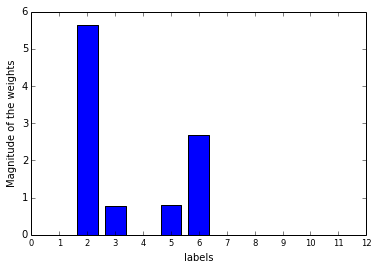

In [1077]:
import matplotlib.pyplot as plt
import plotly.plotly as py

N = len(trueWeights)
x = range(N)
width = 0.75
W1 = [str(a) for a in x]
plt.bar(range(len(trueWeights)),trueWeights, width, color="blue",align='center')
#plt.plot(range(len(RRLambda0_5M10)),RRLambda0_5M10,label='$\lambda$ = 0.5')
#plt.plot(range(len(RRLambda1M10)),RRLambda1M10,label='$\lambda$ = 1')
#plt.plot(range(len(RRLambda2M10)),RRLambda2M10,label='$\lambda$ =2')
#plt.plot(range(len(RRLambda5M10)),RRLambda5M10,label='$\lambda$ = 5')
plt.xticks(range(len(W1)),W1, size='small')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,title = "Mean of the \n noise")
plt.xlabel('labels')
plt.ylabel('Magnitude of the weights')
#plt.yscale('log')
plt.show()

#fig = plt.gcf()
#plot_url = py.plot_mpl(fig, filename='mpl-basic-bar')